In [3]:
exec (open("/Users/pvmarkov/dengue/scripts/functions2.py").read ())
refgenome_file = "/Users/pvmarkov/dengue/data/pDVWSK601-NGC virus.gb"

In [4]:
counts_dataframe = pd.read_csv ("/Users/pvmarkov/dengue/data/mergetwoway_kass_cover_majorb_seqqual>=60ON_alignqualOFF_pairsOFF.csv")
dn_ds_by_codon_dataframe = pd.read_csv ('/Users/pvmarkov/dengue/data/dn_ds_dataframe.csv')
dn_ds_by_codon_dataframe_DENV2 = pd.read_csv ('/Users/pvmarkov/dengue/data/dn_ds_dataframe_DENV2.csv')
pin_pis_dataframe = pd.read_csv ('/Users/pvmarkov/dengue/data/piNpiS.csv')
correction = - getting_position_correction (refgenome_file, ''.join(counts_dataframe ['majorsequence']))

16138


##### The code below calculates and puts in a list coordinates of all gene annotations in DENV genome.

In [5]:
import sys
annotations = '/Users/pvmarkov/dengue/data/ref_geno_anottation_relabel.gff'

try:
    f= open (annotations, 'r')
except IOError:
    print ("Unknown file " + annotations)
    sys.exit()
    
line = ""
annots_list = list ()
line_list = list ()
for l in f:
    if ('CDS' in l or 'UTR' in l) and 'DEN2' not in l and 'Beta-lactamase' not in l:
        line_list = l.split()
        annots_list.append (make_annotation (line_list [12], line_list [3], line_list [4], correction))
#        print (l)
#        print (line_list)
annots_list.sort (key=lambda x: x.start)
print ('The annotations and their positions are: \n',annots_list)
#print (annots_list [0].name)
#print (annots_list [0].start)
            

f.close()

The annotations and their positions are: 
 [5UTR: 0 to 95, "Capsid": 96 to 437, "SP\prM": 396 to 437, "prM": 438 to 935, "M\(mature\form)": 711 to 935, E: 936 to 2420, "NS1": 2421 to 3476, "NS2A": 3477 to 4130, "NS2B": 4131 to 4520, "NS3": 4521 to 6374, "NS4A": 6375 to 6824, "NS4B": 6825 to 7568, "NS5": 7569 to 10271, 3UTR: 10272 to 10722]


KeyError: 'codon_numbers'

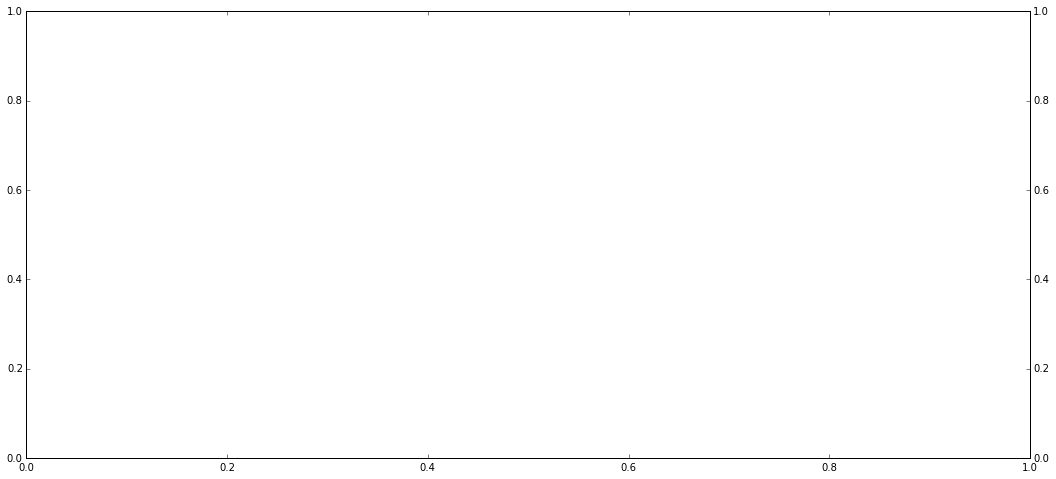

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

moving_average = (runningMeanFast (counts_dataframe ['majorbase_ratio'], 5))
dn_ds_moving_average_DENV2 = (runningMeanFast (dn_ds_by_codon_dataframe_DENV2 ['dn_ds_per_position_in_codon'], 10))

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot (pin_pis_dataframe ['codon_numbers']*3, dn_ds_by_codon_dataframe_DENV2 ['dn_ds_per_position_in_codon'], 'b-') #(position, coverage, 'r-')
#ax1.plot (dn_ds_by_codon_dataframe ['codon_numbers']*3, dn_ds_moving_average, 'b-') #(position, coverage, 'r-')


#ax1.legend (['Sequencing coverage'], loc = 'lower left')
axis_lower_limit = 0
axis_upper_limit = 10
ax1.axis ([0, 11000, axis_lower_limit, axis_upper_limit])
color = 0.0
fcolor = list ('bgrcmybgrcmybgrcmybgrcmy')
color_counter = 0


ax2.plot (counts_dataframe ['position'], moving_average, 'r-') #(position, coverage, 'r-')

axis_lower_limit = 0.985
ax2.axis ([0, 11000, axis_lower_limit, 1])
ax2.ylabel ('Proportion of Reads')
ax2.legend (['The most frequent nucleotide'], loc = 'upper right')

for gene in annots_list:
    color_counter +=1
    ax3.axvspan(gene.start, gene.end, color = (fcolor [color_counter]), alpha = 0.1) #, label='NS5B')
    plt.text (gene.start + ((gene.end - gene.start)/10), 10000 + (15000 *(color_counter%3)) , gene.name, rotation=0)
    #print (color_counter%3)
    color += 1/len(annots_list)


AttributeError: 'AxesSubplot' object has no attribute 'ylabel'

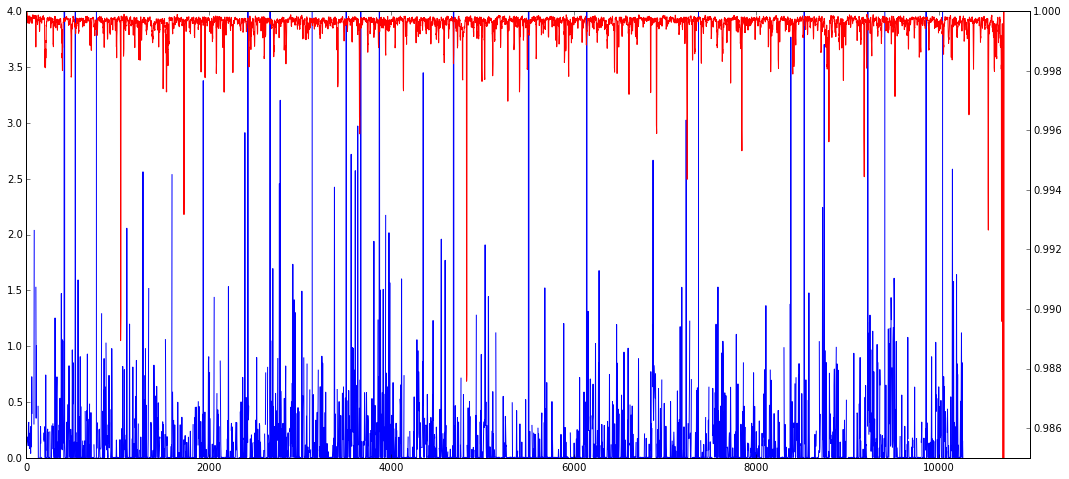

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

moving_average = (runningMeanFast (counts_dataframe ['majorbase_ratio'], 5))
dn_ds_moving_average_DENV2 = (runningMeanFast (dn_ds_by_codon_dataframe_DENV2 ['dn_ds_filtered_uniformative_sites'], 10))

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot (dn_ds_by_codon_dataframe_DENV2 ['codon_numbers']*3, dn_ds_by_codon_dataframe_DENV2 ['dn_ds_filtered_uniformative_sites'], 'b-') #(position, coverage, 'r-')
#ax1.plot (dn_ds_by_codon_dataframe ['codon_numbers']*3, dn_ds_moving_average, 'b-') #(position, coverage, 'r-')


#ax1.legend (['Sequencing coverage'], loc = 'lower left')
axis_lower_limit = 0
axis_upper_limit = 4
ax1.axis ([0, 11000, axis_lower_limit, axis_upper_limit])
color = 0.0
fcolor = list ('bgrcmybgrcmybgrcmybgrcmy')
color_counter = 0


ax2.plot (counts_dataframe ['position'], moving_average, 'r-') #(position, coverage, 'r-')

axis_lower_limit = 0.985
ax2.axis ([0, 11000, axis_lower_limit, 1])
ax2.ylabel ('Proportion of Reads')
ax2.legend (['The most frequent nucleotide'], loc = 'upper right')

for gene in annots_list:
    color_counter +=1
    ax3.axvspan(gene.start, gene.end, color = (fcolor [color_counter]), alpha = 0.1) #, label='NS5B')
    plt.text (gene.start + ((gene.end - gene.start)/10), 10000 + (15000 *(color_counter%3)) , gene.name, rotation=0)
    #print (color_counter%3)
    color += 1/len(annots_list)


### Fig 1. Plot of genetic diversity by genome position of: 
- Our own pilot DENV4 reads (in red, dips = higher diversity, right hand axis). The red graph shows the proportion of reads at a nucleotide site that feature the consensus and so the lower that value is (downward spikes) the more diversity there is at that site. 
- dN/dS  (per codon) in the DENV4 complete genome alignment downloaded from Genbank (in blue, peaks = high dN/dS, left hand axis).

The red graph is the same as the red graph you have seen in earlier analysis - the downward spikes highlighting sites which are less conserved or more polymorphic than the rest.



AttributeError: 'AxesSubplot' object has no attribute 'ylabel'

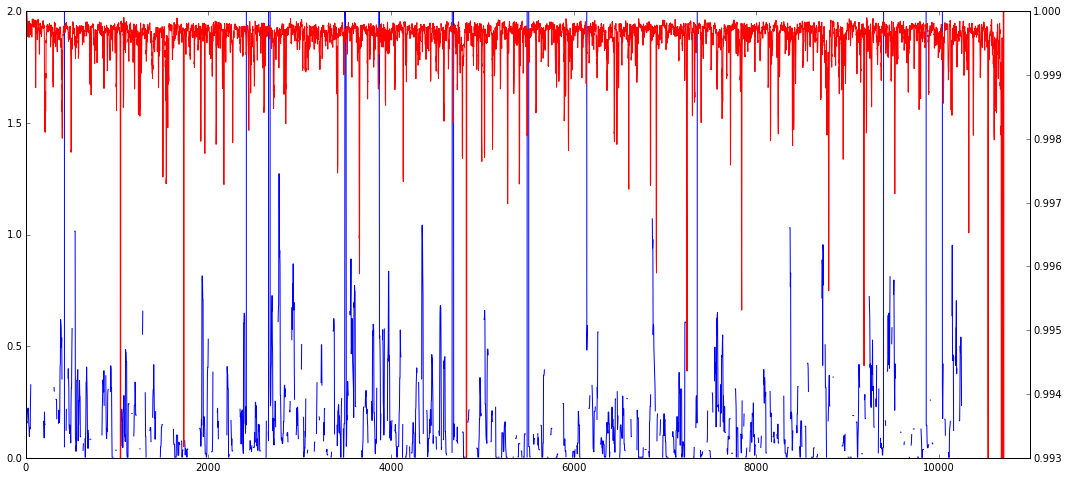

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

moving_average = (runningMeanFast (counts_dataframe ['majorbase_ratio'], 5))
dn_ds_moving_average_DENV2 = (runningMeanFast (dn_ds_by_codon_dataframe_DENV2 ['dn_ds_filtered_uniformative_sites'], 5))

ax1 = plt.gca()
ax2 = ax1.twinx()
#ax1.plot (dn_ds_by_codon_dataframe ['codon_numbers']*3, dn_ds_by_codon_dataframe ['dn_ds_per_position_in_codon'], 'b-') #(position, coverage, 'r-')
ax1.plot (dn_ds_by_codon_dataframe_DENV2 ['codon_numbers']*3, dn_ds_moving_average_DENV2, 'b-') #(position, coverage, 'r-')


#ax1.legend (['Sequencing coverage'], loc = 'lower left')
axis_lower_limit = 0
axis_upper_limit = 2
ax1.axis ([0, 11000, axis_lower_limit, axis_upper_limit])
color = 0.0
fcolor = list ('bgrcmybgrcmybgrcmybgrcmy')
color_counter = 0


ax2.plot (counts_dataframe ['position'], moving_average, 'r-') #(position, coverage, 'r-')

axis_lower_limit = 0.993
ax2.axis ([0, 11000, axis_lower_limit, 1])
ax2.ylabel ('Proportion of Reads')
ax2.legend (['The most frequent nucleotide'], loc = 'upper right')

for gene in annots_list:
    color_counter +=1
    ax3.axvspan(gene.start, gene.end, color = (fcolor [color_counter]), alpha = 0.1) #, label='NS5B')
    plt.text (gene.start + ((gene.end - gene.start)/10), 10000 + (15000 *(color_counter%3)) , gene.name, rotation=0)
    #print (color_counter%3)
    color += 1/len(annots_list)

### Fig 2. Plot of genetic diversity by genome position of: 
- Our own pilot DENV4 reads (in red, dips = higher diversity) alongside 
- dN/dS  (per codon) in the DENV4 complete genome alignment downloaded from Genbank (in blue, peaks = high dN/dS).

### The difference from previous figure is that the blue graph is a smoothed version (moving average, 5 codons window) of dN/dS.

AttributeError: 'AxesSubplot' object has no attribute 'ylabel'

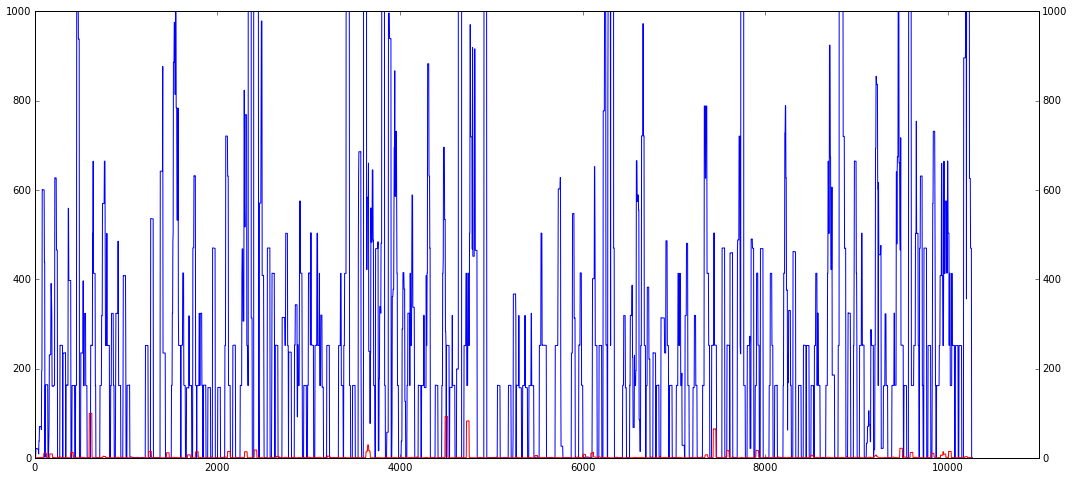

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

moving_average = (runningMeanFast (counts_dataframe ['majorbase_ratio'], 5))
dn_ds_moving_average = (runningMeanFast (dn_ds_by_codon_dataframe ['dn_ds_per_position_in_codon'], 10))
dn_ds_moving_average_DENV2 = (runningMeanFast (dn_ds_by_codon_dataframe_DENV2 ['dn_ds_per_position_in_codon'], 10))

ax1 = plt.gca()
ax2 = ax1.twinx()
#ax1.plot (dn_ds_by_codon_dataframe ['codon_numbers']*3, dn_ds_by_codon_dataframe ['dn_ds_per_position_in_codon'], 'b-') #(position, coverage, 'r-')
ax1.plot (dn_ds_by_codon_dataframe ['codon_numbers']*3, dn_ds_moving_average, 'b-') #(position, coverage, 'r-')


#ax1.legend (['Sequencing coverage'], loc = 'lower left')
axis_lower_limit = 0
axis_upper_limit = 1000
ax1.axis ([0, 11000, axis_lower_limit, axis_upper_limit])
color = 0.0
fcolor = list ('bgrcmybgrcmybgrcmybgrcmy')
color_counter = 0


ax2.plot (dn_ds_by_codon_dataframe_DENV2 ['codon_numbers']*3, dn_ds_moving_average_DENV2, 'r-')

axis_lower_limit = 0
ax2.axis ([0, 11000, axis_lower_limit, axis_upper_limit])
ax2.ylabel ('Proportion of Reads')
ax2.legend (['The most frequent nucleotide'], loc = 'upper right')

for gene in annots_list:
    color_counter +=1
    ax3.axvspan(gene.start, gene.end, color = (fcolor [color_counter]), alpha = 0.1) #, label='NS5B')
    plt.text (gene.start + ((gene.end - gene.start)/10), 10000 + (15000 *(color_counter%3)) , gene.name, rotation=0)
    #print (color_counter%3)
    color += 1/len(annots_list)

### Please ignore - this plot is just a technical comparison for data quality check.
Fig 3. Comparison of dN/dS obtained from the earlier crud data (blue) and from the more refined later data (red).

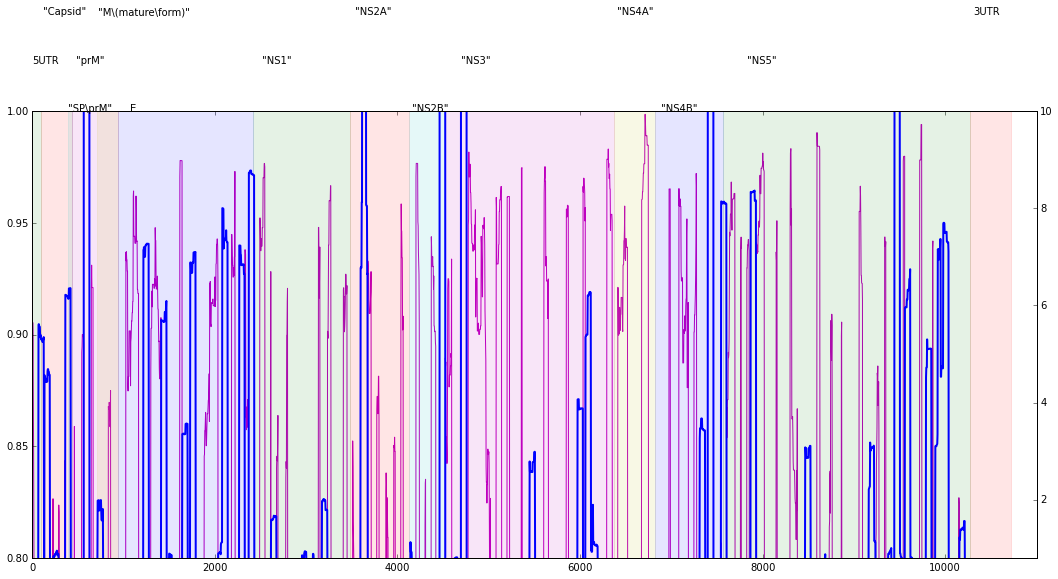

In [10]:
moving_average = (runningMeanFast (counts_dataframe ['majorbase_ratio'], 5))
dn_ds_moving_average = (runningMeanFast (dn_ds_by_codon_dataframe ['dn_ds_per_position_in_codon'], 20))
dn_ds_moving_average_DENV2 = (runningMeanFast (dn_ds_by_codon_dataframe_DENV2 ['dn_ds_per_position_in_codon'], 20))

ax1 = plt.gca()
ax2 = ax1.twinx()
ax3 = plt.gca()
#ax1.plot (dn_ds_by_codon_dataframe ['codon_numbers']*3, dn_ds_by_codon_dataframe ['dn_ds_per_position_in_codon'], 'b-') #(position, coverage, 'r-')
ax1.plot (dn_ds_by_codon_dataframe_DENV2 ['codon_numbers']*3, 1 - dn_ds_moving_average_DENV2, 'm-', linewidth=1.0)



#ax1.legend (['Sequencing coverage'], loc = 'lower left')
axis_lower_limit = 0.8
axis_upper_limit = 1
ax1.axis ([0, 11000, axis_lower_limit, axis_upper_limit])
color = 0.0
fcolor = list ('bgrcmybgrcmybgrcmybgrcmy')
color_counter = 0


ax2.plot (dn_ds_by_codon_dataframe_DENV2 ['codon_numbers']*3, dn_ds_moving_average_DENV2, 'b-', linewidth=2.0) #(position, coverage, 'r-')

axis_upper_limit = 10
ax2.axis ([0, 11000, axis_lower_limit, axis_upper_limit])
#ax2.ylabel ('Proportion of Reads')
#ax2.legend (['The most frequent nucleotide'], loc = 'upper right')

for gene in annots_list:
    color_counter +=1
    ax3.axvspan(gene.start, gene.end, color = (fcolor [color_counter]), alpha = 0.1) #, label='NS5B')
    plt.text (gene.start + ((gene.end - gene.start)/10), 10 + (1 *(color_counter%3)) , gene.name, rotation=0)
    #print (color_counter%3)
    color += 1/len(annots_list)

### Fig 4. Negative (purple) vs. positive (blue) selection along the DENV4 (Genbank) genome. 
- The purple line plots the value of 1-dN/dS. Because the scale (on the left axis) is from 0 to 1, the graph only shows "inverted" values of dN/dS under 1. Peaks in the purple graph therefore represent the lowest dN/dS values of those under one, i.e. indicating conserved sequence regions.
- Blue line is as before, only the scale (on the right axis) is a little different.


/Users/pvmarkov/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


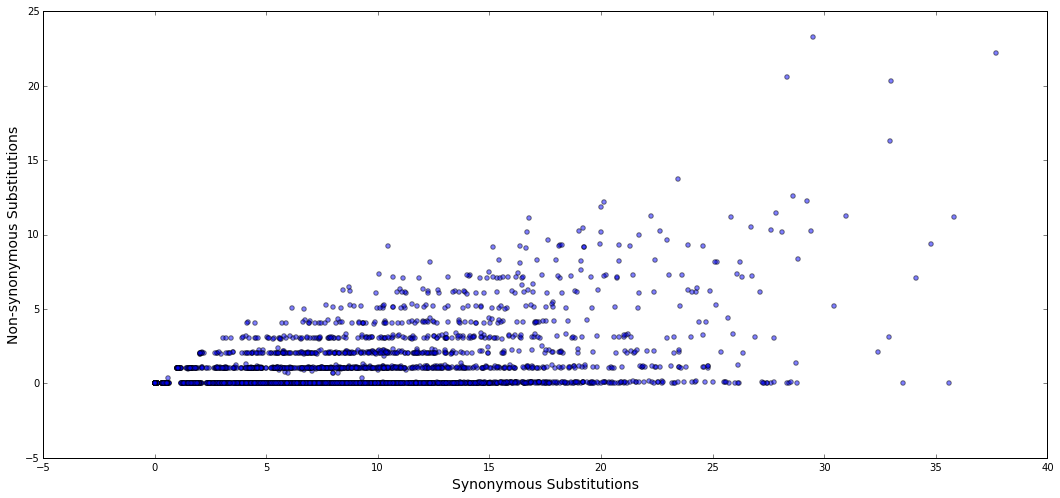

In [11]:
N = 50


#highcover_dataframe = counts_dataframe [counts_dataframe['coverage'] > 100000]

x = dn_ds_by_codon_dataframe_DENV2 ['synonymous_substitutions']
y = dn_ds_by_codon_dataframe_DENV2 ['non_synonymous_substitutions']
#colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radiuses




plt.scatter(x, y, alpha=0.5)
plt.xlabel ('Synonymous Substitutions', fontsize=14)
plt.ylabel ('Non-synonymous Substitutions', fontsize=14)
#plt.legend (['Rleationship between coverage and invariability'], loc = 'lower right')
#fit = np.polyfit(x,y,1)
#fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

#plt.plot(x, fit_fn(x), '-r')
#plt.show()

### Fig 5. Scatter plot of synonymous vs. non-synonymous substitutions per codon position in the DENV2 Genbank alignment.

10716
10275


(-0.078764003769413574, 7.0489702923651575e-14)

/Users/pvmarkov/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


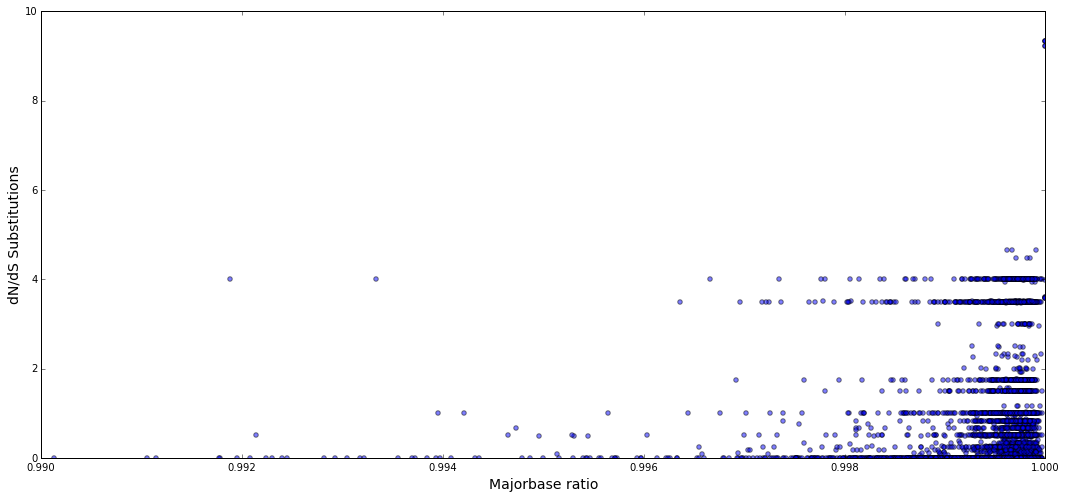

In [12]:

import scipy.stats
N = 50

import math
#highcover_dataframe = counts_dataframe [counts_dataframe['coverage'] > 100000]

x = counts_dataframe ['majorbase_ratio']
y = dn_ds_by_codon_dataframe ['dn_ds_per_position_in_codon']
dn_ds_per_nucleotide=list()
for i in y: # this creates a list of the dn/ds values, but per nucleotide position (not per codon). It simply tripples the number of positions.
    dn_ds_per_nucleotide.append (i)
    dn_ds_per_nucleotide.append (i)
    dn_ds_per_nucleotide.append (i)

y=dn_ds_per_nucleotide
print(len(x))
print(len(y))
#colors = np.random.rand(N)

majorbase_dn_ds_dataframe = pd.DataFrame ({'majorbase': x[0:10000], 'dn_ds': y[0:10000]}) # this creates a dataframe of both majorbase and dn/ds

majorbase_dn_ds_dataframe_filtered = majorbase_dn_ds_dataframe [majorbase_dn_ds_dataframe ['dn_ds'] < 10] # this creates a new dataframe only containing the records where dn_ds <10

area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radiuses


axis_upper_limit = 10
plt.axis ([0.99, 1, 0, axis_upper_limit])


plt.scatter(majorbase_dn_ds_dataframe_filtered ['majorbase'], majorbase_dn_ds_dataframe_filtered ['dn_ds'], alpha=0.5)
plt.xlabel ('Majorbase ratio', fontsize=14)
plt.ylabel ('dN/dS Substitutions', fontsize=14)

scipy.stats.pearsonr(majorbase_dn_ds_dataframe_filtered ['majorbase'], majorbase_dn_ds_dataframe_filtered ['dn_ds'])


### Please ignore - this plot is just a technical comparison for data quality check.
Fig 6. Scatter plot of mojorbase (diversity in our pilot experimental DENV4 dataset) vs. dn/ds in Genbank DENV4 dataset, USING THE OLD DATA - JUST TO COMPARE TO FIGURE BELOW, after removing extreme (>10, perhaps artefactual) dn/ds values.

KeyError: 'dn_ds_filtered_uniformative_sites'

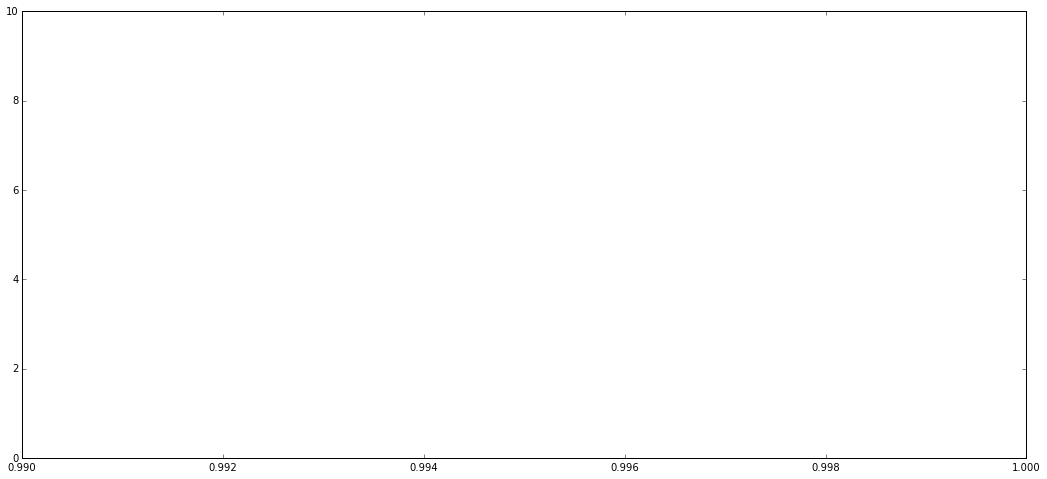

In [13]:

import scipy.stats
N = 50

import math
#highcover_dataframe = counts_dataframe [counts_dataframe['coverage'] > 100000]

x = counts_dataframe ['majorbase_ratio']
y = dn_ds_by_codon_dataframe_DENV2 ['dn_ds_filtered_uniformative_sites']
dn_ds_per_nucleotide=list()
for i in y: # this creates a list of the dn/ds values, but per nucleotide position (not per codon). It simply tripples the number of positions.
    dn_ds_per_nucleotide.append (i)
    dn_ds_per_nucleotide.append (i)
    dn_ds_per_nucleotide.append (i)

y=dn_ds_per_nucleotide
print(len(x))
print(len(y))
#colors = np.random.rand(N)

majorbase_dn_ds_dataframe = pd.DataFrame ({'majorbase': x[0:10000], 'dn_ds_filtered_uniformative_sites': y[0:10000]}) # this creates a dataframe of both majorbase and dn/ds

majorbase_dn_ds_dataframe_DENV2_filtered = majorbase_dn_ds_dataframe [majorbase_dn_ds_dataframe ['dn_ds_filtered_uniformative_sites'] < 10] # this creates a new dataframe only containing the records where dn_ds <10

area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radiuses


axis_upper_limit = 10
plt.axis ([0.99, 1, 0, axis_upper_limit])

plt.scatter (pin_pis_dataframe ['piN'][0:3000] / pin_pis_dataframe['piS'][0:3000], majorbase_dn_ds_dataframe ['dn_ds_filtered_uniformative_sites'][0:3000])
#plt.scatter(majorbase_dn_ds_dataframe_DENV2_filtered ['majorbase'], majorbase_dn_ds_dataframe_DENV2_filtered ['dn_ds_filtered_uniformative_sites'], alpha=0.5)

plt.xlabel ('Majorbase ratio', fontsize=14)
plt.ylabel ('dN/dS Substitutions', fontsize=14)

scipy.stats.pearsonr(majorbase_dn_ds_dataframe_DENV2_filtered ['majorbase'], majorbase_dn_ds_dataframe_DENV2_filtered ['dn_ds_filtered_uniformative_sites'])

### Fig 7. Scatter plot of diversity in our pilot experimental DENV4 dataset vs. dn/ds in Genbank DENV4 dataset, after removing extreme (>10, perhaps artefactual) dn/ds values. Not very informative at present.

In [53]:
dn_ds_by_codon_dataframe_DENV2.describe()

,Unnamed: 0,codon_numbers,dn_ds,dn_ds_per_position_in_codon,non_synonymous_substitutions,synonymous_substitutions
count,3423.000000,3423.000000,3423.000000,3423.000000,3423.000000,3423.000000
mean,1711.000000,1707.985977,4.367319,2.183660,0.997719,7.622967
std,988.279313,989.426311,61.978807,30.989403,1.958379,5.511234
min,0.000000,-4.000000,0.000275,0.000138,0.000705,0.000261
25%,855.500000,851.500000,0.002780,0.001390,0.013334,3.325494
50%,1711.000000,1707.000000,0.004370,0.002185,0.033074,6.776607
75%,2566.500000,2565.500000,0.256627,0.128314,1.052118,10.627564
max,3422.000000,3421.000000,1986.028926,993.014463,23.307145,35.557722


### Fig 7 (Multiple plots - below). Scatter plot, by DENV gene, of association between synonymous and non-synonymous substitutions per codon position in the DENV4 Genbank alignment. Same as Fig 5, only by gene.

96 437


/Users/pvmarkov/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


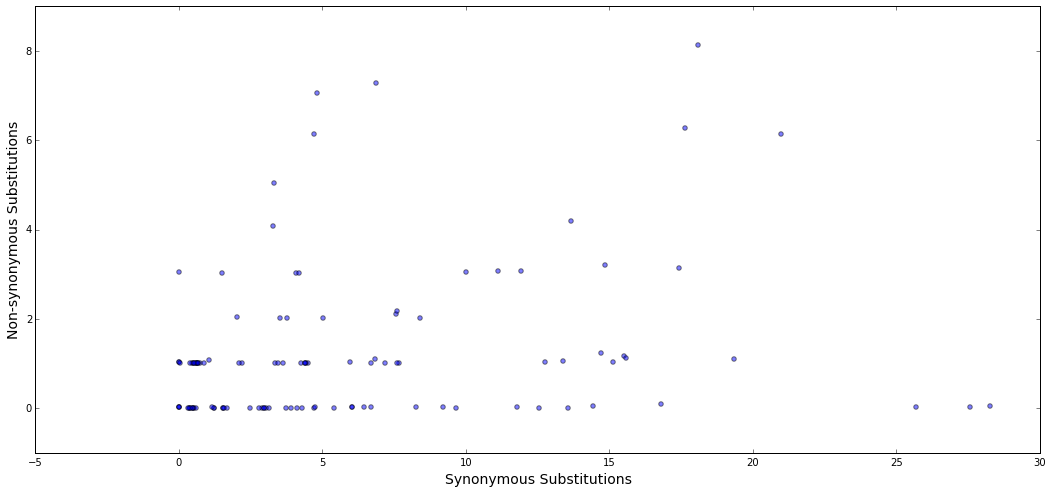

396 437


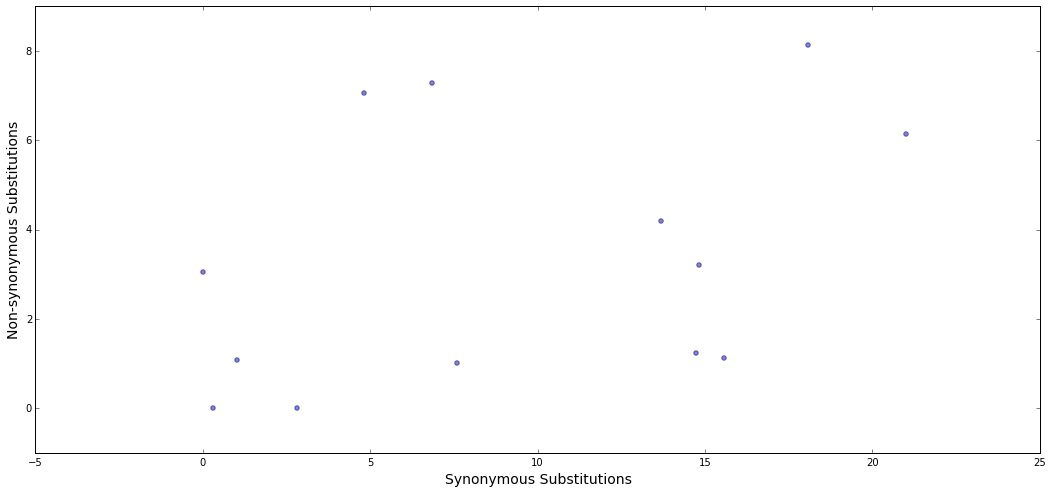

438 935


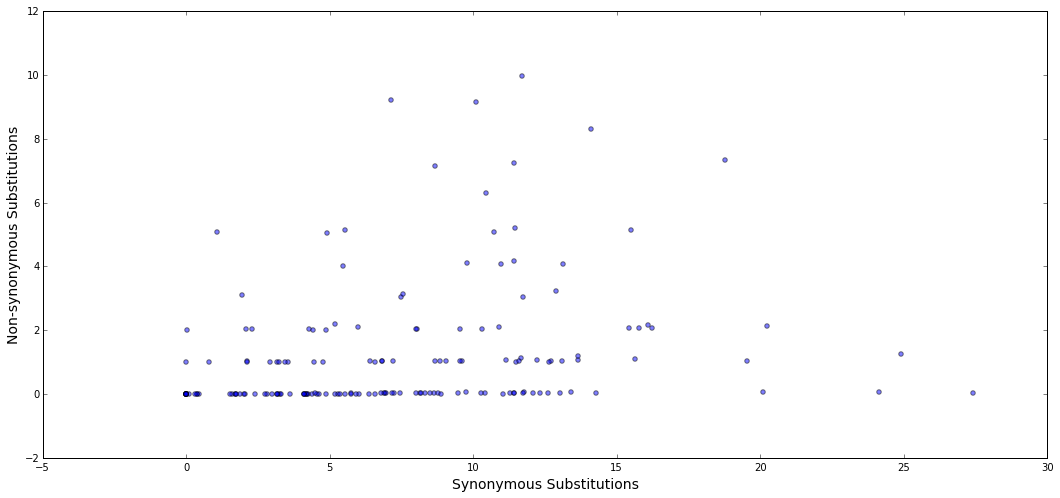

711 935


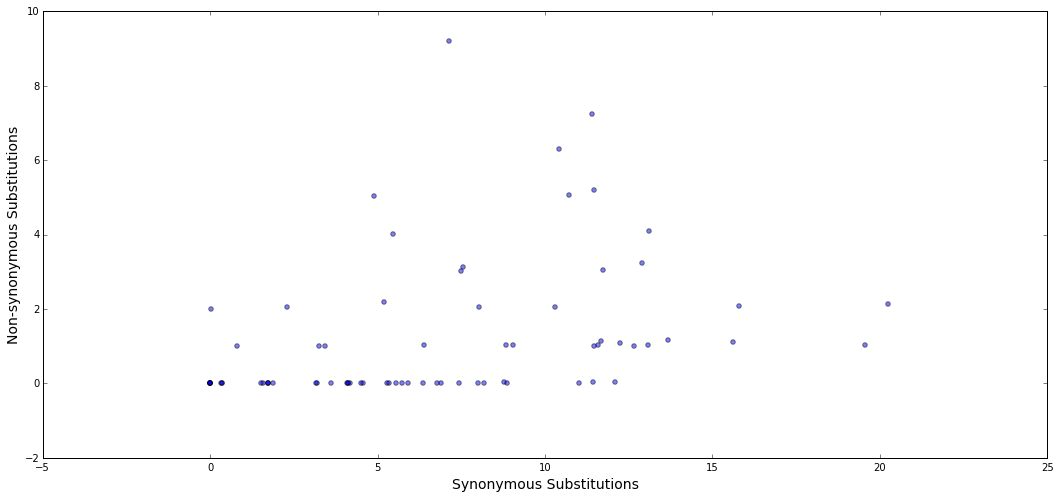

936 2420


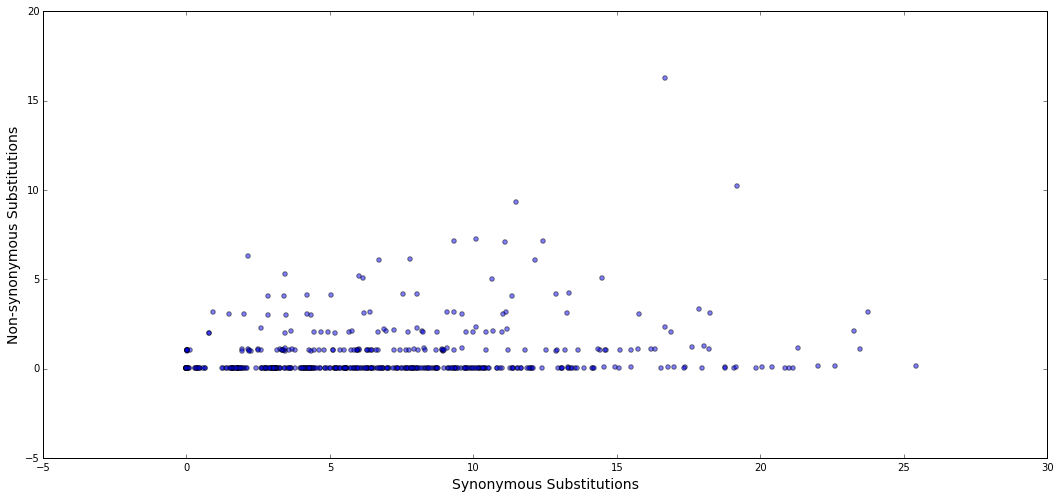

2421 3476


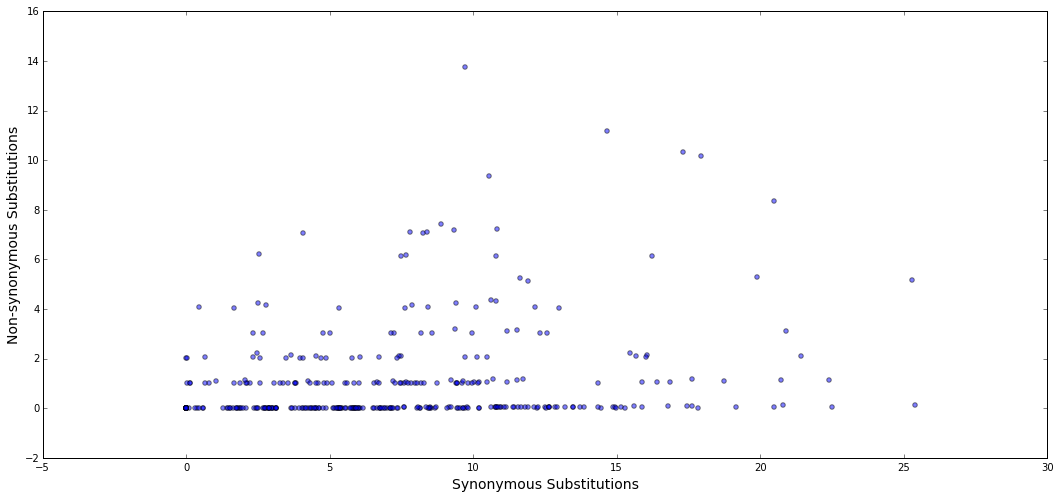

3477 4130


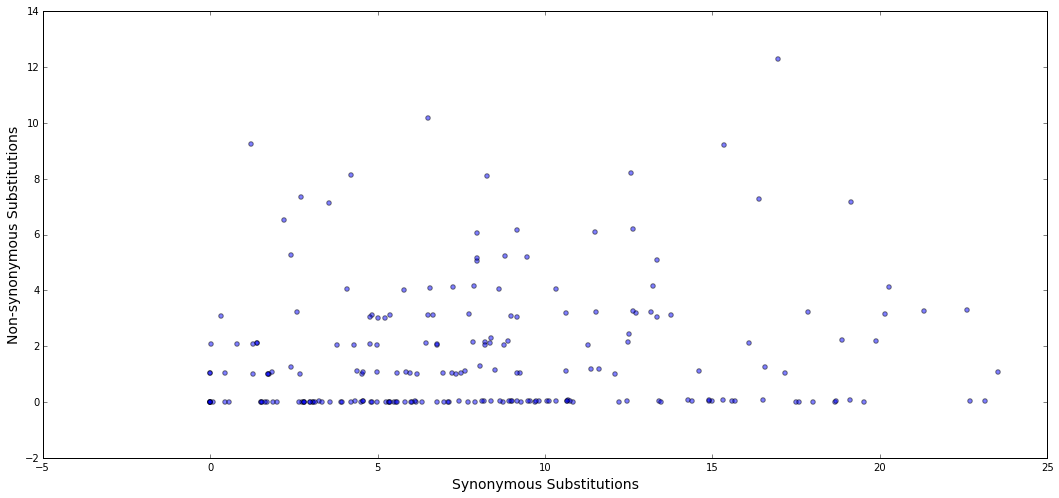

4131 4520


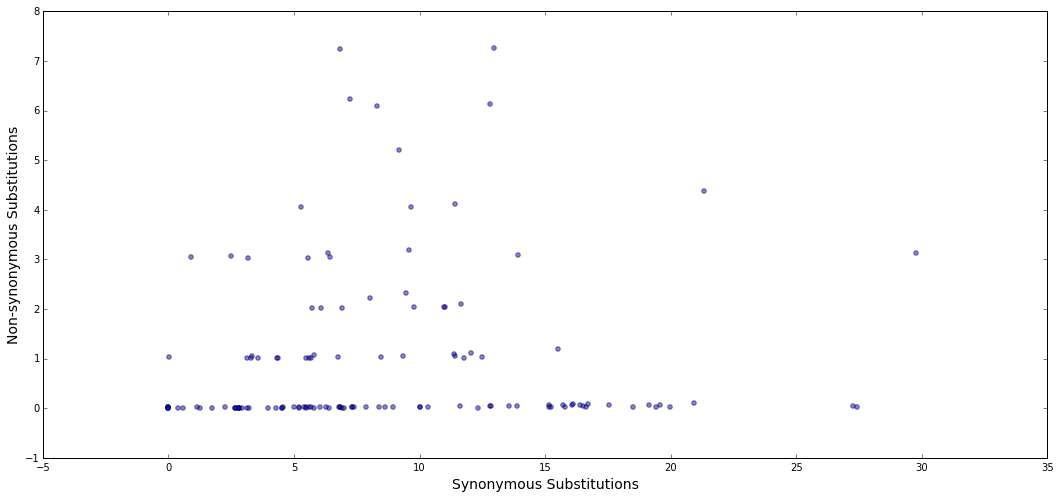

4521 6374


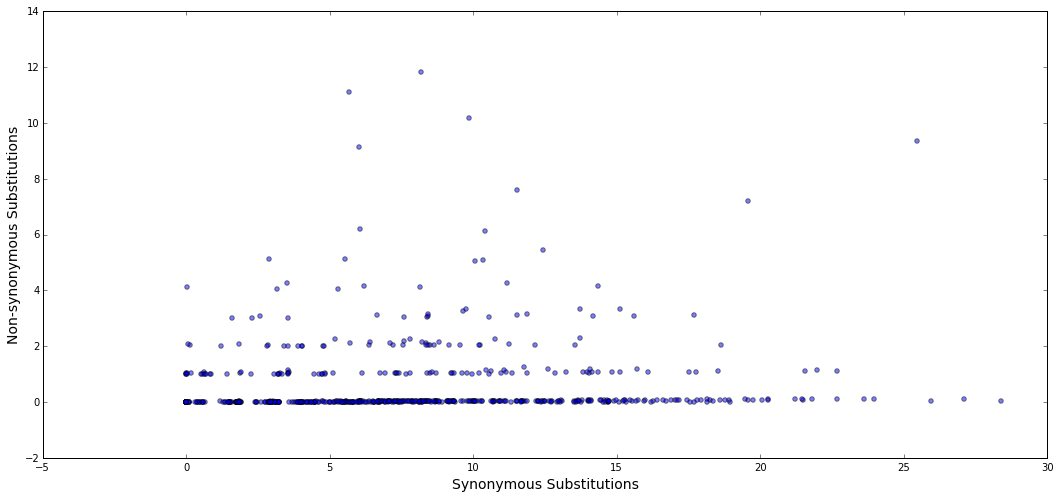

6375 6824


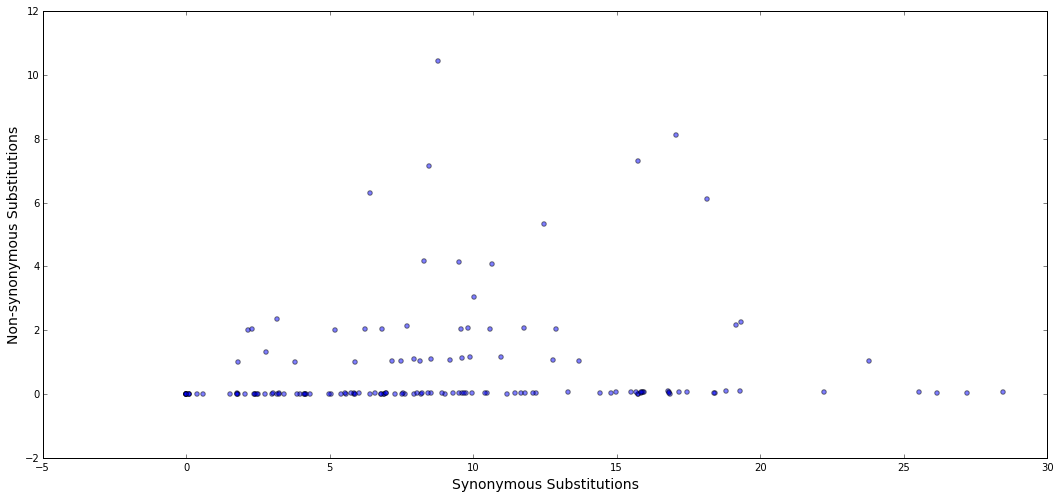

6825 7568


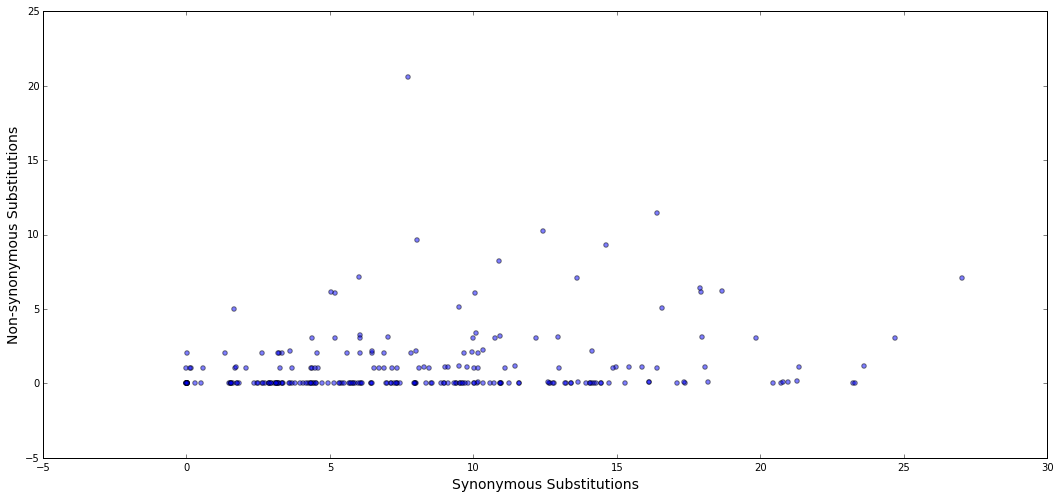

7569 10271


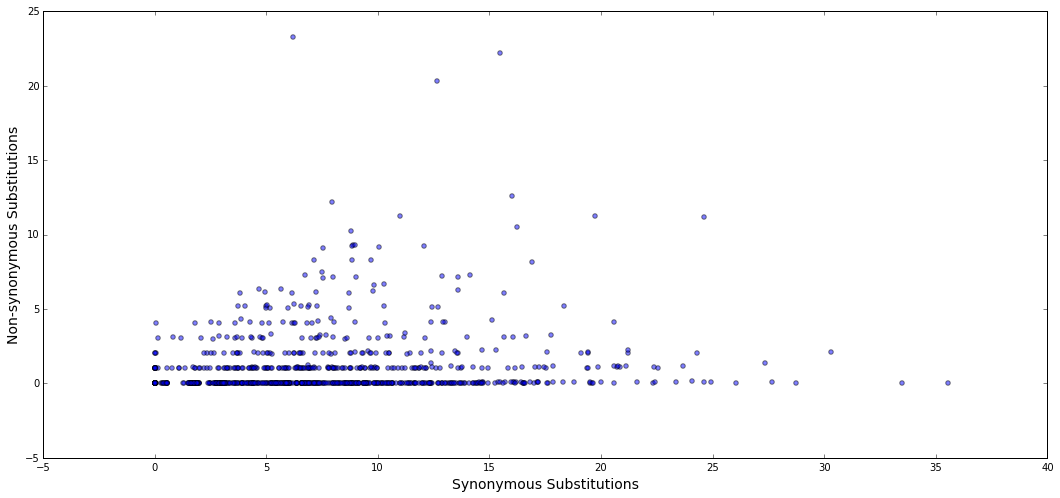

In [54]:

for gene in annots_list:
    if gene.start == 0 or gene.start == 10272:
        pass
    else:
        print (gene.start, gene.end)
        x  = dn_ds_by_codon_dataframe_DENV2 ['synonymous_substitutions'] [int(gene.start/3) : int(gene.end/3)]
        y  = dn_ds_by_codon_dataframe_DENV2 ['non_synonymous_substitutions'] [int(gene.start/3) : int(gene.end/3)]
        
        area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radiuses
        
        plt.scatter(x, y, alpha=0.5)
        plt.xlabel ('Synonymous Substitutions', fontsize=14)
        plt.ylabel ('Non-synonymous Substitutions', fontsize=14)
        plt.show()
